In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io


In [2]:

import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
import pandas as pd
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# 1. Download the data using requests
resp1 = requests.get(URL1)

# 2. Read the content into a pandas DataFrame
# We use io.BytesIO to treat the downloaded bytes as a file
data = pd.read_csv(io.BytesIO(resp1.content))

# 3. Verify the data loaded correctly
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
# 1. Define the URL
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# 2. Use requests.get to download the file (no 'await' or 'fetch' needed)
resp2 = requests.get(URL2)

# 3. Read the CSV content into the variable X
X = pd.read_csv(io.BytesIO(resp2.content))

# 4. Verify the data
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
# 1. Select the 'Class' column as a Pandas Series (single bracket)
# 2. Convert it to a NumPy array using to_numpy()
# 3. Assign it to the variable Y
Y = data['Class'].to_numpy()

# Display Y to verify
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# Task 2 
# students get this 
transform = preprocessing.StandardScaler()

In [9]:
#Task 3 

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Optional: Verify the shapes of the resulting sets
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

Number of training samples: 72
Number of testing samples: 18


In [10]:
Y_test.shape

(18,)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')

# 1. Create a logistic regression object 
# Added max_iter=1000 to give the solver more time to converge
lr = LogisticRegression(max_iter=1000)

# 2. Parameters dictionary remains the same
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# 3. Create and Fit GridSearchCV
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8196428571428571


In [12]:
# Calculate the accuracy score on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)

print(f"Test Data Accuracy: {test_accuracy}")

Test Data Accuracy: 0.8333333333333334


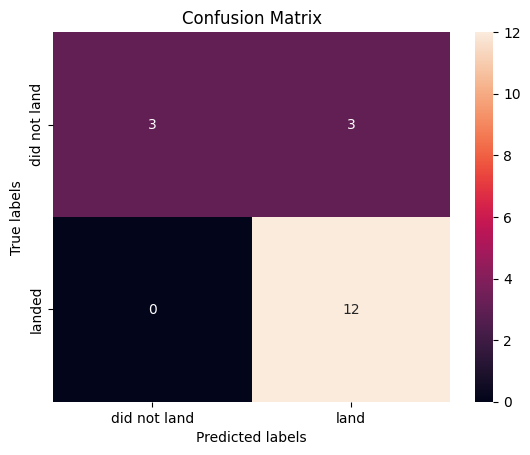

In [13]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [14]:

# 1. Define the parameter grid for SVM
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# 2. Create a support vector machine object
svm = SVC()


In [15]:

# 3. Create a GridSearchCV object svm_cv with cv = 10
# 2. Create GridSearchCV with n_jobs=-1 for maximum speed
# n_jobs=-1 tells your computer to use all available CPU cores
# verbose=2 will show you the progress so you know it's working
svm_cv = GridSearchCV(svm, parameters, cv=10, n_jobs=-1, verbose=2)

# 4. Fit the object to find the best parameters
svm_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 125 candidates, totalling 1250 fits


KeyboardInterrupt: 

In [ ]:

# Display results
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

In [ ]:
# 1. Transform X_test using the same scaler (transform) used for X_train
# Note: If you already defined X_test_scaled in the previous step, you can skip this line.
X_test_scaled = transform.transform(X_test)

# 2. Calculate the accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test_scaled, Y_test)

print(f"SVM Test Data Accuracy: {svm_test_accuracy}")

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:


# 1. Define the parameter grid for Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# 2. Create a decision tree classifier object
tree = DecisionTreeClassifier()

# 3. Create a GridSearchCV object tree_cv with cv = 10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# 4. Fit the object to find the best parameters
# Note: Decision trees do not require scaled data, but using X_train_scaled is fine.
tree_cv.fit(X_train, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

In [ ]:
# Calculate the accuracy on the test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)

print(f"Decision Tree Test Data Accuracy: {tree_test_accuracy}")

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:

# 1. Define the parameter grid for KNN
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# 2. Create a KNN classifier object
KNN = KNeighborsClassifier()

# 3. Create a GridSearchCV object knn_cv with cv = 10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# 4. Fit the object to find the best parameters
# Use scaled data for better distance-based calculations
knn_cv.fit(X_train_scaled, Y_train)

# Display results
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

In [ ]:
# Calculate the accuracy on the test data using scaled features
knn_test_accuracy = knn_cv.score(X_test_scaled, Y_test)

print(f"KNN Test Data Accuracy: {knn_test_accuracy}")

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:

# Create a dictionary of the scores
scores = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': [logreg_cv.score(X_test, Y_test), 
                      svm_cv.score(X_test_scaled, Y_test), 
                      tree_cv.score(X_test, Y_test), 
                      knn_cv.score(X_test_scaled, Y_test)]
}

# Convert to DataFrame
df_scores = pd.DataFrame(scores)
print(df_scores)